In [124]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from collections import Counter


In [4]:
n = []
u=[]
for k in range(0,1000,10):
    url = 'https://www.yelp.com/search?find_loc=Boston,+MA&start='+str(k)+'&cflt=restaurants'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    time.sleep(0.5)
    for i in soup.find_all("span",{"class":"indexed-biz-name"}):
        name = i.find("a").get_text()
        l = i.find("a")['href']
        link = 'https://www.yelp.com/'+str(l)
        n.append(name)
        u.append(link)
        
print (n)
print (u)

['Neptune Oyster', 'Fuji at Ink Block', 'Gre.Co', 'Saltie Girl', 'Giacomo’s Ristorante', 'Barcelona Wine Bar South End', 'Luke’s Lobster Back Bay', 'Publico Street Bistro & Garden', 'Row 34', 'Island Creek Oyster Bar', 'Toro', 'Pomodoro', 'Buttermilk & Bourbon', 'Carmelina’s', 'The Salty Pig', 'Bostonia Public House', 'Shojo', 'Tikkaway Fresh Indian Grill', 'Gaslight Brasserie', 'SRV Boston', 'Ostra', 'Lolita Cocina & Tequila Bar', 'by CHLOE. Seaport', 'Wheelhouse', 'The Daily Catch', 'Jm Curley', 'Piattini', 'Chilacates Mexican Street Food', 'Q Restaurant', 'Silvertone', 'Tapestry', 'Dig Inn', 'Love Art Sushi', 'The Gallows', 'Myers & Chang', 'The Brewer’s Fork', 'Al Dente Restaurant', 'Luna’s Italian and Latin Cuisine', 'The Beehive', 'Giacomo’s', 'Eastern Standard Kitchen and Drinks', 'Panza', 'Frenchie Wine Bistro', 'Ward 8', 'Yankee Lobster', 'The Paramount', 'Loco Taqueria and Oyster Bar', 'VERTS Mediterranean Grill', 'Committee', 'Ma Maison', 'Audubon Boston', 'Scopa', 'New Sush

In [6]:
def get_infor(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    time.sleep(1)
    try:
        pr =  soup.find('dd',{'class':'nowrap price-description'}).get_text().strip()
    except AttributeError:
        pr= "None"
    try:
        zc = soup.find('span',{'itemprop':'postalCode'}).get_text()
    except AttributeError:
        zc = "None"
    location = soup.find('div',{'class':'lightbox-map hidden'})
    try:
        div_2 = location['data-map-state']
        lag = re.findall(r"[-+]?\d*\.\d+|\d+",re.findall(r'latitude(.*?),',div_2)[0])[0]
        lng = re.findall(r"[-+]?\d*\.\d+|\d+",re.findall(r'longitude(.*?),',div_2)[0])[0]
    except TypeError:
        lag ="None"
        lbg = 'None'
    return (zc,lag,lng,pr)


In [8]:
zipcode = []
langtitude = []
longitude = []
p = []
for link in u:
    time.sleep(2)
    z,la,ln,price = get_infor(link)
    zipcode.append(z)
    langtitude.append(la)
    longitude.append(ln)
    p.append(price)
    print (link)

https://www.yelp.com//biz/neptune-oyster-boston
https://www.yelp.com//biz/fuji-at-ink-block-boston
https://www.yelp.com//biz/gre-co-boston-2
https://www.yelp.com//biz/saltie-girl-boston
https://www.yelp.com//biz/giacomos-ristorante-boston
https://www.yelp.com//biz/barcelona-wine-bar-south-end-boston-6
https://www.yelp.com//biz/lukes-lobster-back-bay-boston
https://www.yelp.com//biz/publico-street-bistro-and-garden-boston
https://www.yelp.com//biz/row-34-boston
https://www.yelp.com//biz/island-creek-oyster-bar-boston
https://www.yelp.com//biz/toro-boston
https://www.yelp.com//biz/pomodoro-boston-2
https://www.yelp.com//biz/buttermilk-and-bourbon-boston-2
https://www.yelp.com//biz/carmelinas-boston-2
https://www.yelp.com//biz/the-salty-pig-boston
https://www.yelp.com//biz/bostonia-public-house-boston-4
https://www.yelp.com//biz/shojo-boston-2
https://www.yelp.com//biz/tikkaway-fresh-indian-grill-boston
https://www.yelp.com//biz/gaslight-brasserie-boston-4
https://www.yelp.com//biz/srv-bo

In [51]:
df = pd.DataFrame({'Restaurant':n,'latitude':langtitude,'longitude':longitude,'zipcode':zipcode,'price':p})
df

,Restaurant,latitude,longitude,price,zipcode
0,Neptune Oyster,42.3632711771092,-71.0560575975533,$31-60,02113
1,Fuji at Ink Block,42.345077,-71.063505,$11-30,02118
2,Gre.Co,42.3500454,-71.0816971,$11-30,02116
3,Saltie Girl,42.3511906,-71.0777142,$31-60,02116
4,Giacomo’s Ristorante,42.3645913,-71.053358,$11-30,02113
5,Barcelona Wine Bar South End,42.3449355147724,-71.0705436362457,$11-30,02116
6,Luke’s Lobster Back Bay,42.3487198596183,-71.0793047980242,$11-30,02116
7,Publico Street Bistro & Garden,42.3372542,-71.0437136,$31-60,02127
8,Row 34,42.3496337161869,-71.0473232766807,$31-60,02210
9,Island Creek Oyster Bar,42.348682243174,-71.095118452365,$31-60,02215


In [24]:
df.to_csv('Boston restaurant.csv')

In [66]:
df = pd.DataFrame.from_csv("Boston restaurant.csv")

In [67]:
group = df.groupby('price')['Restaurant']
group.count()

price
$11-30       522
$31-60       134
Above $61     26
None          19
Under $10    299
Name: Restaurant, dtype: int64

In [68]:
df = df[df.price != "None"]
df = df[df.zipcode !="None"]
df.loc[df.price == 'Under $10','price'] = 1
df.loc[df.price == '$11-30','price'] = 2
df.loc[df.price == '$31-60','price'] = 3
df.loc[df.price == 'Above $61','price'] = 4
df = df.reset_index(drop=True)
df

,Restaurant,latitude,longitude,price,zipcode
0,Neptune Oyster,42.363271,-71.056058,3,02113
1,Fuji at Ink Block,42.345077,-71.063505,2,02118
2,Gre.Co,42.350045,-71.081697,2,02116
3,Saltie Girl,42.351191,-71.077714,3,02116
4,Giacomo’s Ristorante,42.364591,-71.053358,2,02113
5,Barcelona Wine Bar South End,42.344936,-71.070544,2,02116
6,Luke’s Lobster Back Bay,42.348720,-71.079305,2,02116
7,Publico Street Bistro & Garden,42.337254,-71.043714,3,02127
8,Row 34,42.349634,-71.047323,3,02210
9,Island Creek Oyster Bar,42.348682,-71.095118,3,02215


**There are five price ranges: None,Under10,11-30,31-60,Above60.**

**So I delete the restaurant without price range and zipcode, then rank the price with 1,2,3,4, bigger number represents higher price.**

In [74]:
df['lat_long'] = df[['latitude', 'longitude']].apply(tuple, axis=1)
co = df["lat_long"].tolist()

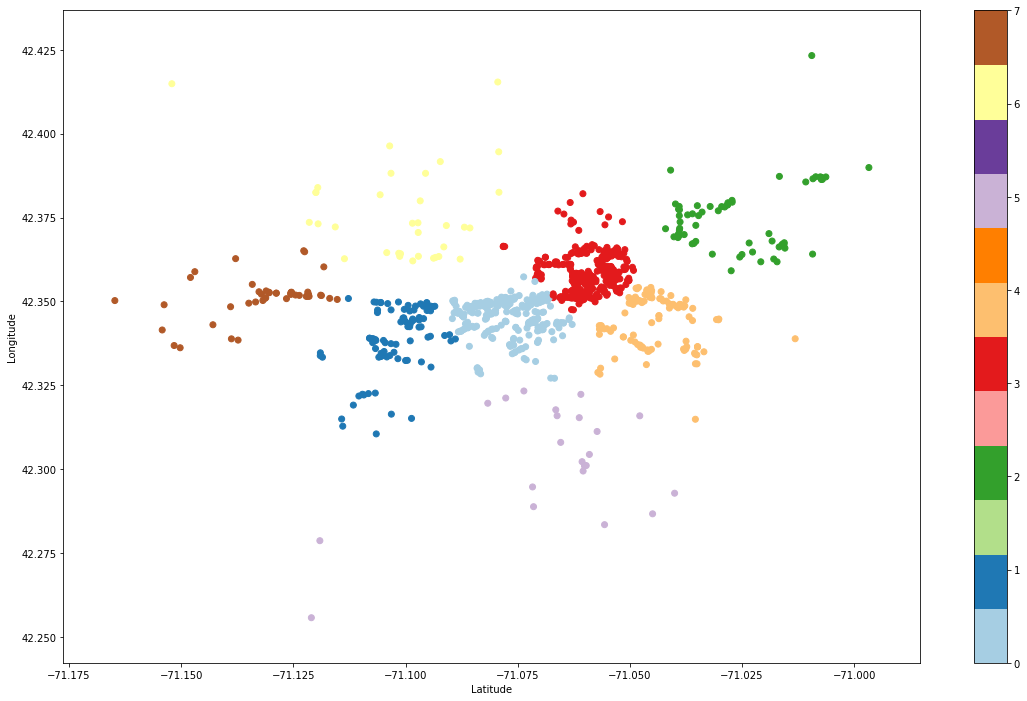

In [110]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(co)
label = kmeans.labels_
plt.figure(figsize=(19.2,12))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
x = df['longitude'].tolist()
y = df['latitude'].tolist()
plt.scatter(x,y,alpha=1,c=label,cmap='Paired')
plt.colorbar()
plt.show()

In [116]:
df['label'] = label
df

,Restaurant,latitude,longitude,price,zipcode,lat_long,label
0,Neptune Oyster,42.363271,-71.056058,3,02113,"(42.3632711771, -71.0560575976)",3
1,Fuji at Ink Block,42.345077,-71.063505,2,02118,"(42.345077, -71.063505)",0
2,Gre.Co,42.350045,-71.081697,2,02116,"(42.3500454, -71.0816971)",0
3,Saltie Girl,42.351191,-71.077714,3,02116,"(42.3511906, -71.0777142)",0
4,Giacomo’s Ristorante,42.364591,-71.053358,2,02113,"(42.3645913, -71.053358)",3
5,Barcelona Wine Bar South End,42.344936,-71.070544,2,02116,"(42.3449355148, -71.0705436362)",0
6,Luke’s Lobster Back Bay,42.348720,-71.079305,2,02116,"(42.3487198596, -71.079304798)",0
7,Publico Street Bistro & Garden,42.337254,-71.043714,3,02127,"(42.3372542, -71.0437136)",4
8,Row 34,42.349634,-71.047323,3,02210,"(42.3496337162, -71.0473232767)",4
9,Island Creek Oyster Bar,42.348682,-71.095118,3,02215,"(42.3486822432, -71.0951184524)",1


In [133]:
g0 = df.loc[df['label'] == 8]['zipcode'].tolist()
Counter(g0)

Counter()

In [6]:
ll = ['02010','02131','02136','02144','02148','02150','02151','02201','02474','02124','02446']
for r in ll:
    df = df[df.zipcode !=r]

In [7]:
ziplist = []
group2 = df.groupby('zipcode')
for i,j in group2:
    ziplist.append(i)
    
print(len(group2))
group2.size()

30


zipcode
02108     44
02109     46
02110     50
02111     86
02113     65
02114     52
02115     65
02116    111
02118     65
02119     10
02120      8
02122      9
02125      7
02127     45
02128     60
02129     13
02130     10
02134     18
02135     10
02138      6
02139     14
02141      3
02142      3
02143      3
02145      4
02199     11
02210     69
02215     71
02228      5
02445      4
dtype: int64